## DEAP (Distributed Evolutionary Algorithms in Python)

**DEAP** es un marco de trabajo en Python para implementar algoritmos evolutivos. Proporciona una forma organizada y simplificada de coordinar los diferentes componentes necesarios para cualquier algoritmo evolutivo. Para cualquier componente, DEAP proporciona la mayoría de las variaciones comunes como componentes predefinidos, al tiempo que proporciona suficiente flexibilidad para definir sus propias variaciones en caso de que los componentes habituales no sean suficientes para su problema.

Primero definamos un problema ficticio que podemos optimizar usando AG. En muchas situaciones tendrás algún proceso natural, lo llamaremos proceso de generación de datos, que se querrá modelar para poder hacer predicciones más adelante. El proceso de generación de datos es como una caja negra, nunca puedes mirar dentro, pero puedes darle una entrada y responderá con una salida.


A continuación, una explicación detallada del framework DEAP y un tutorial paso a paso para crear un ejemplo de algoritmo genético simple que optimiza una función matemática.

**1. Instalación de DEAP**

Primero, instalar DEAP. Se puedes hacer usando pip:


In [1]:
!pip install deap

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB 330.3 kB/s eta 0:00:04
     - -------------------------------------- 0.0/1.1 MB 326.8 kB/s eta 0:00:04
     ---- ----------------------------------- 0.1/1.1 MB 656.4 kB/s eta 0:00:02
     ------------ --------------------------- 0.3/1.1 MB 1.6 MB/s eta 0:00:01
     -------------------------- ------------- 0.7/1.1 MB 2.7 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for deap: filename=deap-1.4.1-py3-none-any.whl size=97349 sha256=a1a1959c473ac056f295479be242a3873c44ff60e013c5730ae89ca186ea3799
  Stored in directory: c:\users\marco\appdata\local\pip\cache\wheels\f8\64\b8\65eacfbff3024ae2e2beb22e691d5c8abb89fbd863b8049b5f
Success

**2. Explicación de los Componentes Clave de DEAP**

DEAP se compone de varios módulos importantes:

- **Creator:** Define los tipos de individuos y la población.

- **Base:** Contiene las funciones y clases básicas para crear el algoritmo evolutivo.

- **Tools:** Proporciona herramientas útiles como operadores de selección, cruce y mutación.

- **Algorithms:** Implementa algoritmos evolutivos estándar.


**a. Creator**

El módulo creator se utiliza para definir nuevos tipos de datos, que representan individuos y sus aptitudes en la población. Esto permite una gran flexibilidad al definir la estructura de los individuos.

- **Fitness:** Representa la aptitud de un individuo. En DEAP, se puede definir diferentes tipos de aptitud, como maximización o minimización.

- **Individual:** Representa un individuo en la población. Normalmente, los individuos son listas, pero pueden ser de cualquier tipo.

Ejemplo:

*from deap import creator*

*#Crear un tipo de fitness para maximización
creator.create("FitnessMax", base.Fitness, weights=(1.0,))*

*#Crear un tipo de individuo que es una lista con el tipo de fitness definido anteriormente
creator.create("Individual", list, fitness=creator.FitnessMax)*

**b. Base**

El módulo base proporciona clases y funciones básicas para crear y manipular los componentes de los algoritmos evolutivos.

- **Toolbox:** Es una caja de herramientas que contiene todas las funciones necesarias para crear y manipular individuos, así como para implementar los operadores evolutivos.

Ejemplo:

*from deap import base*

*#Crear una caja de herramientas*

*toolbox = base.Toolbox()*

**c. Tools**

El módulo tools ofrece un conjunto de operadores y funciones que son comúnmente usados en algoritmos evolutivos, como la inicialización de individuos, operadores de cruce (crossover), mutación y selección.

- **initRepeat:** Inicializa una estructura repitiendo una función dada.
- **cxTwoPoint:** Operador de cruce de dos puntos.
- **mutGaussian:** Operador de mutación que añade ruido gaussiano.
- **selTournament:** Operador de selección por torneo.

Ejemplo:

*from deap import tools*

*#Registrar un atributo individual: un número flotante en el rango [-10, 10]*

*toolbox.register("attr_float", random.uniform, -10, 10)*

*#Registrar la estructura del individuo*

*toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 1)*

*#Registrar la estructura de la población*

*toolbox.register("population", tools.initRepeat, list, toolbox.individual)*


**d. Algorithms**

El módulo algorithms contiene implementaciones de algoritmos evolutivos estándar que puedes utilizar directamente.

- eaSimple: Implementa un algoritmo evolutivo simple.
- eaMuPlusLambda: Implementa un algoritmo evolutivo de tipo *𝜇 + λ.*

Ejemplo:

*from deap import algorithms*

*#Ejecutar el algoritmo evolutivo simple*

*population, logbook = algorithms.eaSimple(
    population, toolbox, 
    cxpb=0.5, mutpb=0.2, ngen=40, 
    stats=stats, verbose=True
)*


**Resumen del Flujo de Trabajo en DEAP**

**1. Definir Tipos con Creator:** Define la estructura y la aptitud de los individuos.

**2. Configurar la Caja de Herramientas con Base:** Registra funciones para la creación y manipulación de individuos y la población.

**3. Registrar Operadores con Tools:** Define operadores de inicialización, cruce, mutación y selección.

**4. Implementar el Algoritmo con Algorithms:** Utiliza algoritmos predefinidos para ejecutar el proceso evolutivo.

**3. Ejemplo Desarrollado**

Vamos a crear un algoritmo genético para maximizar la función f(x)=x^2.

El objetivo es encontrar el valor de x que maximiza esta función en el rango [−10, 10 ].


**Paso 1:** Importar las Bibliotecas Necesarias:

In [1]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

**Paso 2:** Definir los Tipos de Individuos y la Población

Utilizaremos el módulo creator para definir el tipo de individuo y la población.

In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)


**Paso 3:** Configurar el Algoritmo Evolutivo

Configuramos la caja de herramientas (toolbox) para definir cómo se crearán y manipularán los individuos.


In [3]:
toolbox = base.Toolbox()

# Atributo de un individuo: un número flotante en el rango [-10, 10]
toolbox.register("attr_float", random.uniform, -10, 10)

# Estructura de un individuo: un solo atributo
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 1)

# Estructura de la población: una lista de individuos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


**Paso 4:** Definir la Función de Evaluación

Definimos la función objetivo que queremos maximizar.

In [4]:
def eval_func(individual):
    x = individual[0]
    return (x**2,)

toolbox.register("evaluate", eval_func)

**Paso 5:** Definir los Operadores Genéticos

Registramos los operadores de selección, cruce y mutación.

In [5]:
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


**Paso 6:** Configurar el Algoritmo Evolutivo

In [6]:
def main():
    random.seed(42)
    
    # Crear una población inicial de 300 individuos
    population = toolbox.population(n=300)
    
    # Definir las estadísticas que queremos recolectar
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    # Ejecutar el algoritmo evolutivo
    population, logbook = algorithms.eaSimple(
        population, toolbox, 
        cxpb=0.5, mutpb=0.2, ngen=40, 
        stats=stats, verbose=True
    )
    
    return population, logbook

if __name__ == "__main__":
    population, logbook = main()


gen	nevals	avg    	std    	min        	max    
0  	300   	35.1213	30.5809	0.000137411	99.7714
1  	187   	61.1105	39.7275	0.00195513 	253.144
2  	179   	94.7726	64.208 	0.0235178  	477.016
3  	179   	157.852	115.818	0.0195685  	851.793
4  	188   	290.171	241.435	0.00217555 	1818.06
5  	180   	480.362	384.657	0.263722   	3179.39
6  	173   	864.109	671.581	0.0132516  	4527.03
7  	194   	1384.27	1005.21	0.00375854 	8046.75
8  	179   	2071.72	1272.24	0.264025   	8046.75
9  	178   	3443.48	2496.7 	7.11357    	17219.3
10 	189   	5928.6 	4076.17	10.0194    	34465.5
11 	176   	9082.81	5960.55	0.613826   	34465.5
12 	183   	15445.2	11543.4	3.75727    	96058.9
13 	179   	27500.2	21151.2	1975.85    	168454 
14 	203   	48606.8	39921  	7.75016    	259520 
15 	192   	90350.8	81013.1	14.4886    	565027 
16 	166   	176132 	177129 	19.9738    	1.25409e+06
17 	197   	329521 	299383 	287.219    	2.18358e+06
18 	171   	588243 	463891 	17.7827    	2.93636e+06
19 	172   	1.03499e+06	910038 	2275.64    	7.558

**Paso 7:** Ejecutar y Analizar los Resultados

Ejecuta el script anterior para ver cómo evoluciona la población y encuentra el valor óptimo de 
𝑥
x. El algoritmo imprimirá estadísticas sobre la población en cada generación, como el valor promedio de la función de aptitud (fitness), la desviación estándar y los valores mínimo y máximo.

**Paso 8:** Visualizar los Resultados

Podemos visualizar los resultados utilizando Matplotlib.

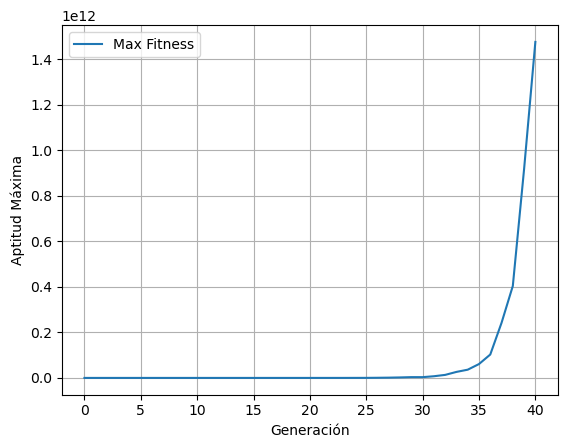

In [8]:
import matplotlib.pyplot as plt

# Obtener los valores máximos de aptitud en cada generación
gen = logbook.select("gen")
maxs = logbook.select("max")

# Crear una gráfica
plt.plot(gen, maxs, label="Max Fitness")
plt.xlabel("Generación")
plt.ylabel("Aptitud Máxima")
plt.legend(loc="best")
plt.grid()
plt.show()